<a href="https://colab.research.google.com/github/weibb123/SP500_Stock/blob/main/%5BProject%5D_Analyze_SP500_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import





<br> 1.) What was the change in price of the stock over time? </br>
<br>2.) What was the daily return of the stock on average?</br>
<br>3.) What was the moving average of the various stocks?</br>
<br>4.) How much value do we put at risk by investing in a particular stock?</br>
<br>5.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of SP500 using LSTM)</br>

In [ ]:
  pip install yfinance

     |████████████████████████████████| 6.4 MB 41.5 MB/s 
     |████████████████████████████████| 63 kB 900 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install --upgrade mplfinance

     |████████████████████████████████| 64 kB 2.6 MB/s 


In [ ]:
import time
import yfinance as yf
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime
import mplfinance as mpf
import math
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
SP500 = yf.Ticker("^GSPC") # Information about company can be obtain using Ticker, in this case, ^GSPC -> sp500  https://finance.yahoo.com/lookup/

SP500.info   # Ticker.info returns vast amount of data bout this company in dictionary format, such as earning, high, lows, and income etcs.

{'algorithm': None,
 'ask': 4568.93,
 'askSize': 0,
 'averageDailyVolume10Day': 3883332000,
 'averageVolume': 3320887213,
 'averageVolume10days': 3883332000,
 'beta': None,
 'bid': 4459.92,
 'bidSize': 0,
 'circulatingSupply': None,
 'currency': 'USD',
 'dayHigh': 4516.89,
 'dayLow': 4414.02,
 'dividendRate': None,
 'dividendYield': None,
 'exDividendDate': None,
 'exchange': 'SNP',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EST',
 'expireDate': None,
 'fiftyDayAverage': 4635.7783,
 'fiftyTwoWeekHigh': 4818.62,
 'fiftyTwoWeekLow': 3723.34,
 'fiveYearAvgDividendYield': None,
 'forwardPE': None,
 'fromCurrency': None,
 'gmtOffSetMilliseconds': '-18000000',
 'isEsgPopulated': False,
 'lastMarket': None,
 'logo_url': '',
 'market': 'us_market',
 'marketCap': None,
 'maxAge': 1,
 'maxSupply': None,
 'messageBoardId': 'finmb_INDEXGSPC',
 'navPrice': None,
 'open': 4431.79,
 'openInterest': None,
 'payoutRatio': None,
 'preMarketPrice': None,
 'previousClose':

In [ ]:
# Lets visualize the SP500 stocks for the past 3 years
data = SP500.history(period='3y')
df = pd.DataFrame(data)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-02-01,2702.320068,2716.659912,2696.879883,2706.530029,3759270000,0,0
2019-02-04,2706.489990,2724.989990,2698.750000,2724.870117,3359840000,0,0
2019-02-05,2728.340088,2738.979980,2724.030029,2737.699951,3560430000,0,0
2019-02-06,2735.050049,2738.080078,2724.149902,2731.610107,3472690000,0,0
2019-02-07,2717.530029,2719.320068,2687.260010,2706.050049,4099490000,0,0
...,...,...,...,...,...,...,...
2022-01-25,4366.640137,4411.009766,4287.109863,4356.450195,3989420000,0,0
2022-01-26,4408.430176,4453.229980,4304.799805,4349.930176,4046270000,0,0
2022-01-27,4380.580078,4428.740234,4309.500000,4326.509766,4074330000,0,0


#Visualizing SP500 stocks
In this section, we will begin by visualizing stocks overtime 
<br>SP500 stocks does not have missing values. no need to use <b>fillna() </b> </br>

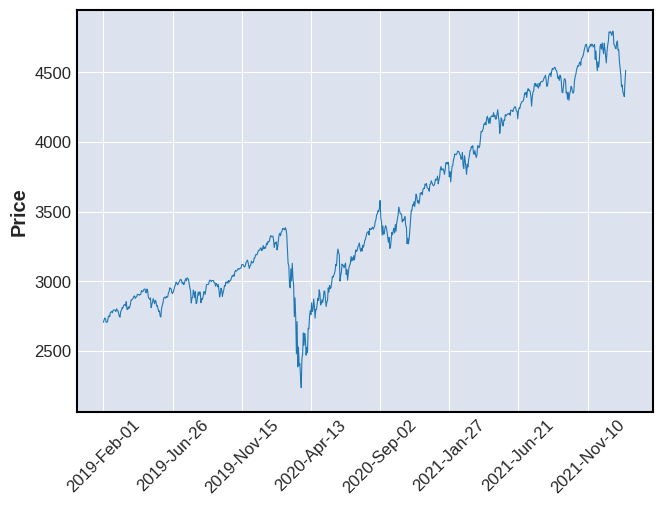

In [ ]:
# visualize SP500 stocks overtime
mpf.plot(df,type='line')



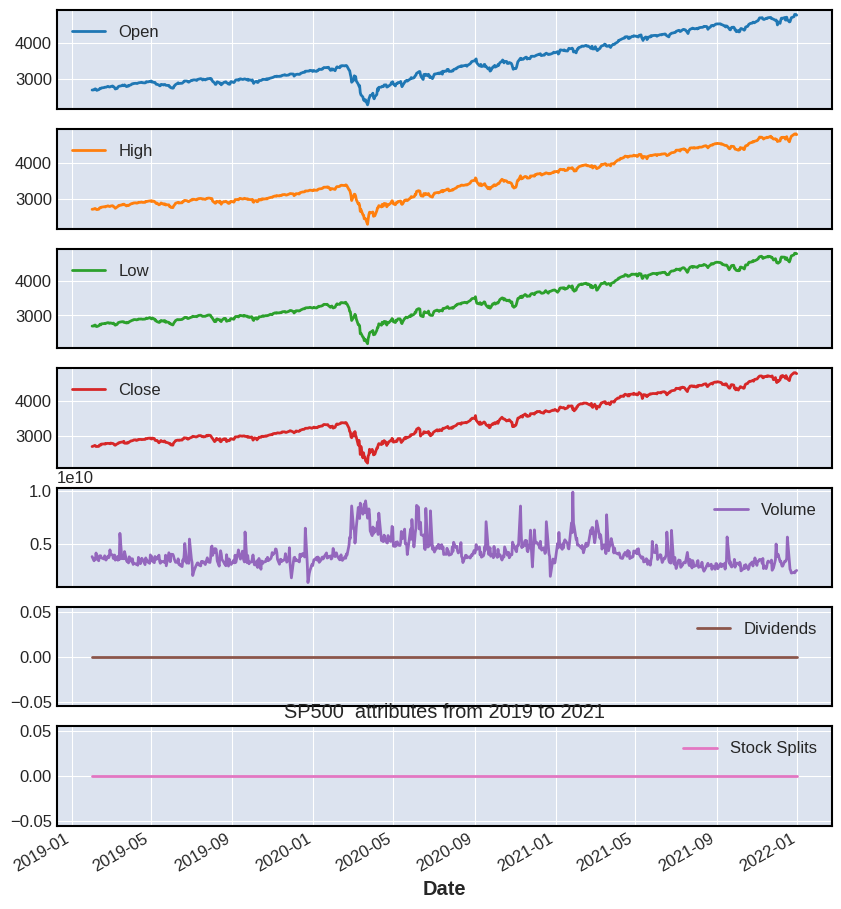

In [ ]:
#  create subplots to view open close high low volume separately.
df['2019':'2021'].plot(subplots=True, figsize=(10,12))
plt.title('SP500  attributes from 2019 to 2021')
plt.show()

#Finance and Statistic

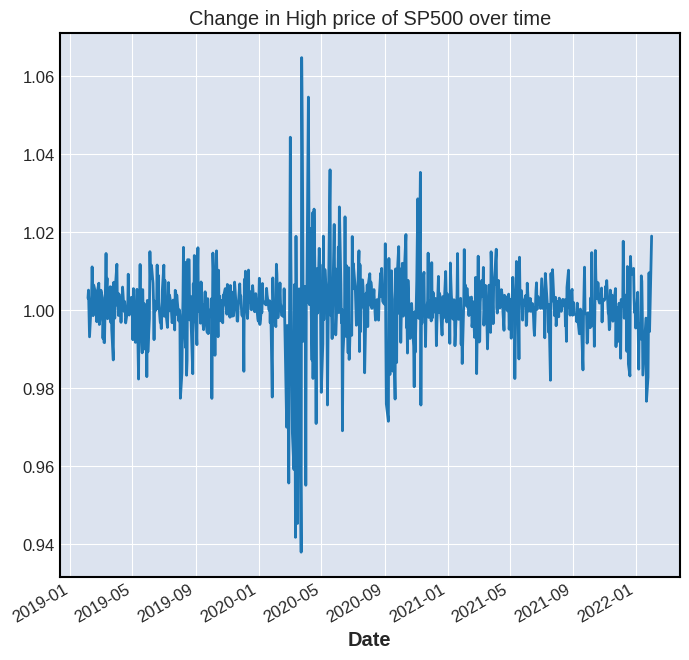

In [ ]:
# calculate percent change of SP500 price overtime
df['change'] = df.High.div(df.High.shift())
df['change'].plot(figsize=(8,8))
_ = plt.title('Change in High price of SP500 over time')

There is a huge change in price during 2020 because of covid19

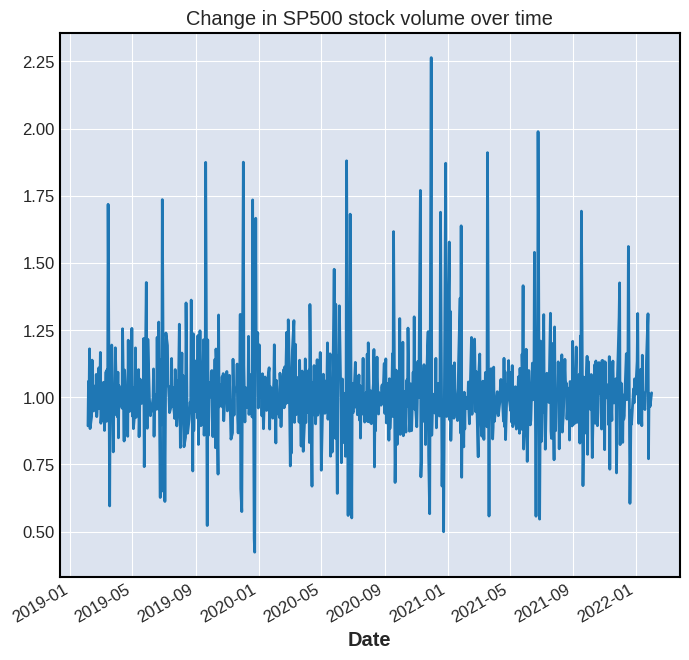

In [ ]:
# calculate percent change of SP500 volume overtime
df['volume_change'] = df.Volume.div(df.Volume.shift())
df['volume_change'].plot(figsize=(8,8))
_ = plt.title('Change in SP500 stock volume over time')

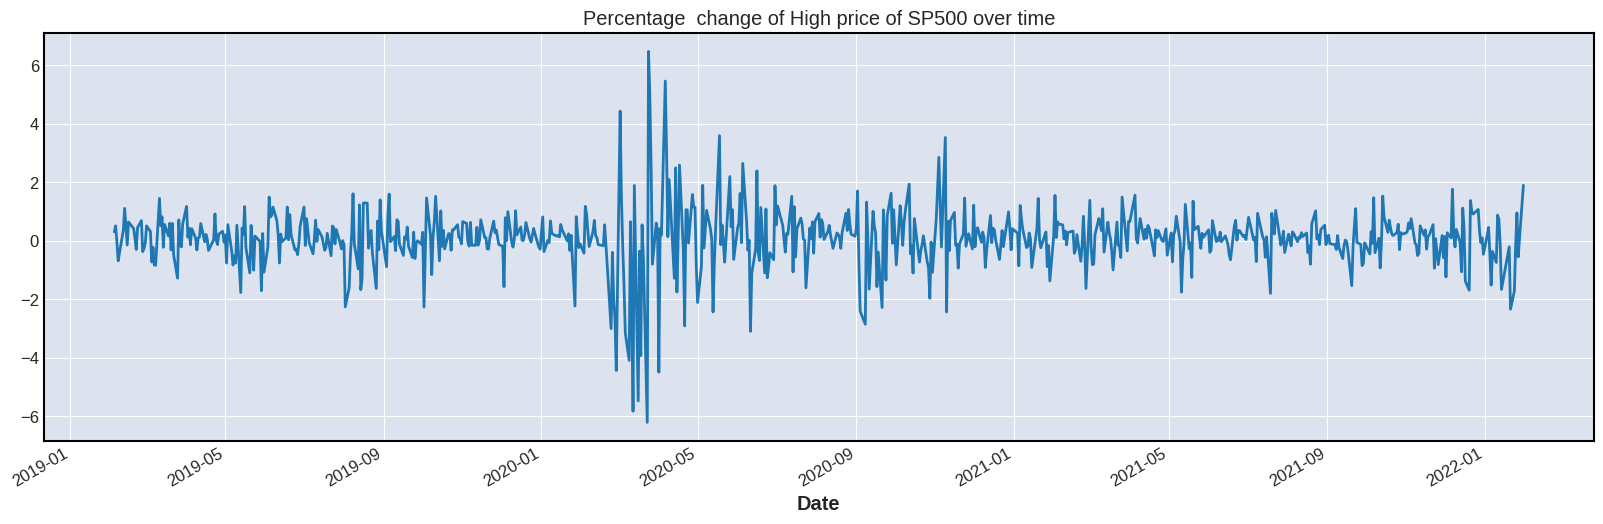

In [ ]:
# calculate stock return for SP500
df.High.pct_change().mul(100).plot(figsize=(20,6)) 
_ = plt.title('Percentage  change of High price of SP500 over time')

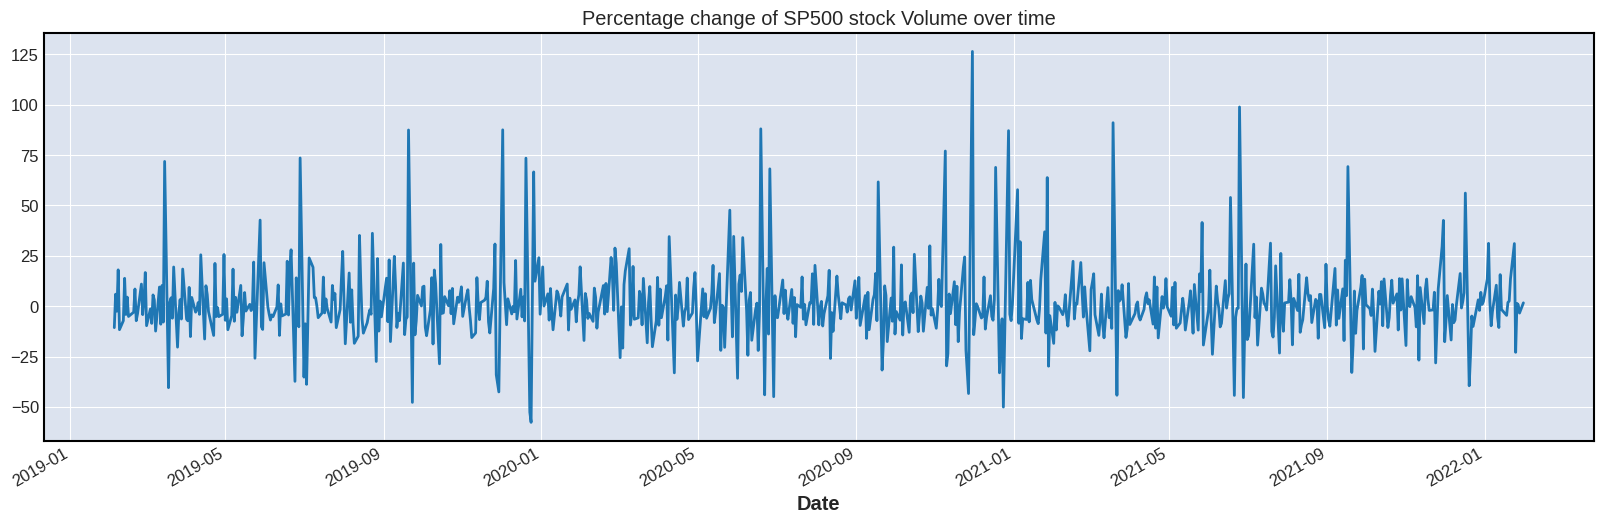

In [ ]:
df.Volume.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns
_ = plt.title('Percentage change of SP500 stock Volume over time')

## Absolute Change

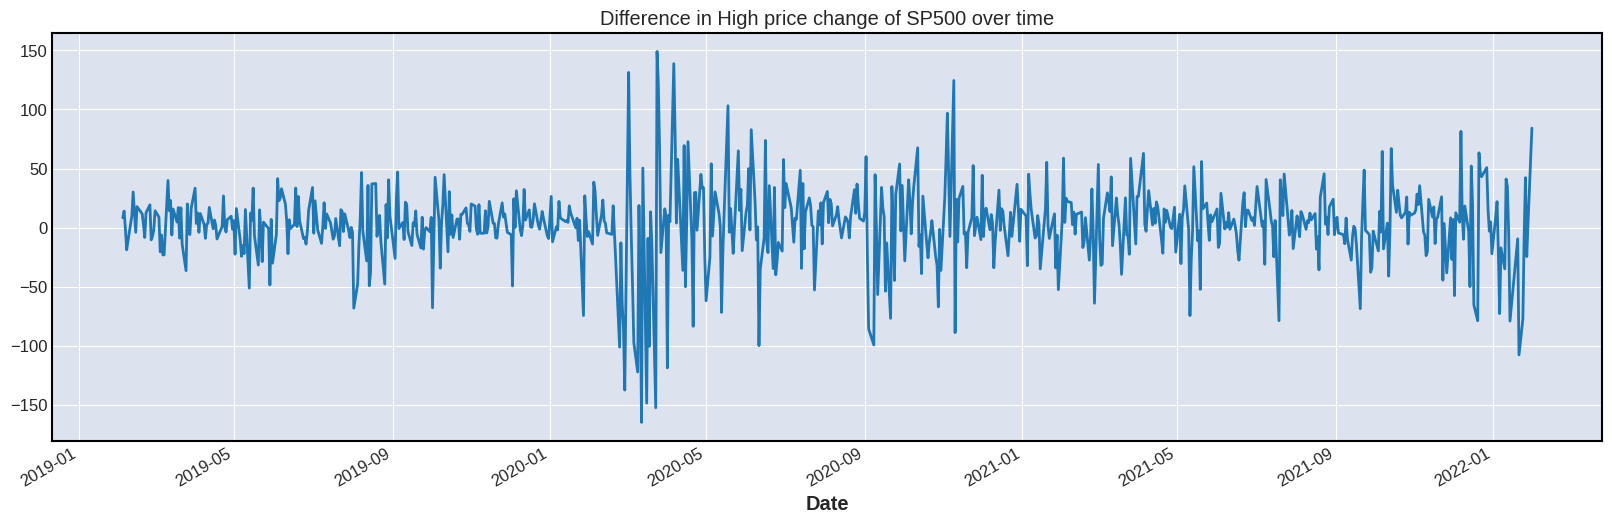

In [ ]:
df.High.diff().plot(figsize=(20,6))
_ = plt.title('Difference in High price change of SP500 over time')

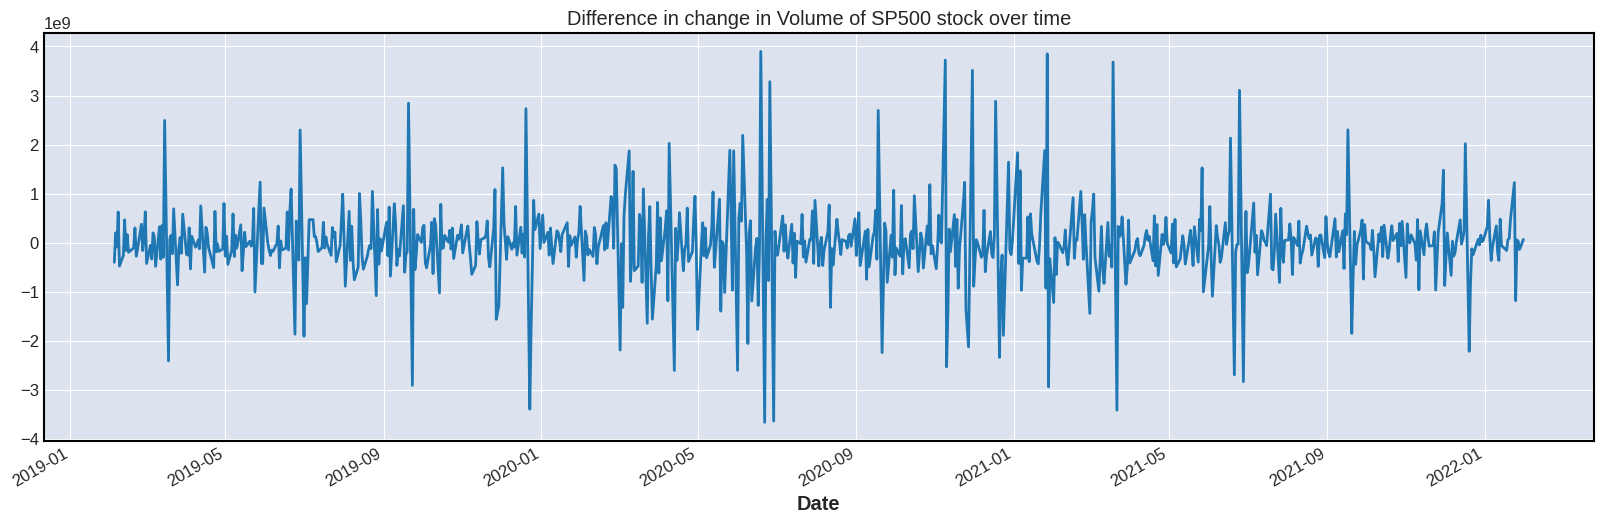

In [ ]:
df.Volume.diff().plot(figsize=(20,6))
_ = plt.title('Difference in change in Volume of SP500 stock over time')

## Compare two or more time series(Stocks)

We will compare 2 time series by normalizing them. This is achieved by dividing each time series element of all time series by the first element. This way both series start at the same point and can be easily compared.

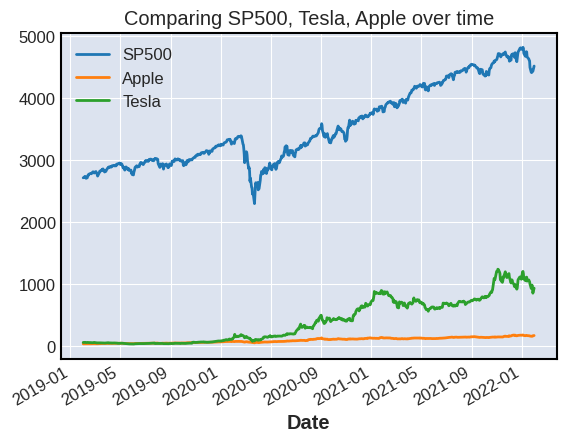

In [ ]:
Apple = yf.Ticker("AAPL")
Tesla = yf.Ticker("TSLA")

Apple_data = Apple.history(period='3y')
Apple_df = pd.DataFrame(Apple_data)
Tesla_data = Tesla.history(period='3y')
Tesla_df = pd.DataFrame(Tesla_data)

df.High.plot()
Apple_df.High.plot()
Tesla_df.High.plot()
plt.legend(['SP500', 'Apple', 'Tesla'])
_ = plt.title('Comparing SP500, Tesla, Apple over time')
plt.show()

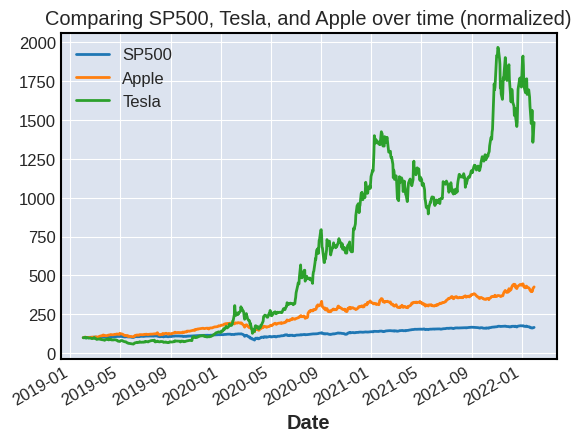

In [ ]:
# Normalizing and comparison
# Both stocks start from 100
normalized_df = df.High.div(df.High.iloc[0]).mul(100)
normalized_apple = Apple_df.High.div(Apple_df.High.iloc[0]).mul(100)
normalized_Tesla = Tesla_df.High.div(Tesla_df.High.iloc[0]).mul(100)
normalized_df.plot()
normalized_apple.plot()
normalized_Tesla.plot()
_ = plt.title('Comparing SP500, Tesla, and Apple over time (normalized)')
plt.legend(['SP500','Apple', 'Tesla'])
plt.show()

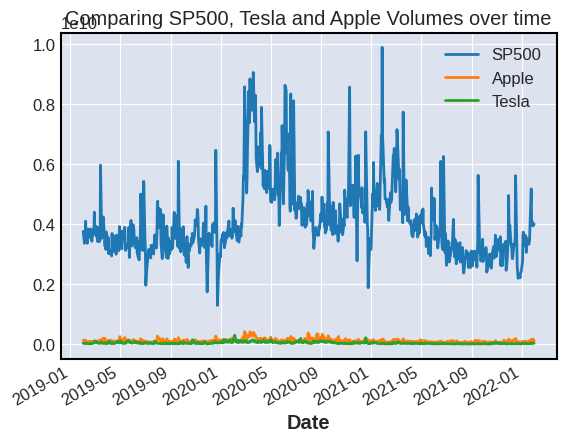

In [ ]:
# Plotting before normalization
df.Volume.plot()
Apple_df.Volume.plot()
Tesla_df.Volume.plot()
plt.legend(['SP500','Apple', 'Tesla'])
_ = plt.title('Comparing SP500, Tesla and Apple Volumes over time')
plt.show()

#Cost for investing in SP500
### How much value do we put in risk if we invest in SP500 stock?

In [ ]:
# First we need to create a dataframe with all the closing df for  all stocks
closing_df = pd.DataFrame(df)
closing_df = closing_df.drop(columns=['Open', 'High','Low','Close','Volume','Dividends','Stock Splits','change','volume_change'])
closing_df['Appl'] = Apple_df['Close']
closing_df['Tesla'] = Tesla_df['Close']
closing_df['SP500'] = df['Close']
closing_df

,Appl,Tesla,SP500
Date,,,
2019-02-01,40.413464,62.442001,2706.530029
2019-02-04,41.561409,62.577999,2724.870117
2019-02-05,42.272503,64.269997,2737.699951
2019-02-06,42.287067,63.444000,2731.610107
2019-02-07,41.486176,61.501999,2706.050049
...,...,...,...
2022-01-25,159.779999,918.400024,4356.450195
2022-01-26,159.690002,937.409973,4349.930176
2022-01-27,159.220001,829.099976,4326.509766


In [ ]:
# Once we have all the closing price for all stocks, we can compute daily return for all stocks
all_rets = closing_df.pct_change()
all_rets.head

<bound method NDFrame.head of                 Appl     Tesla     SP500
Date                                    
2019-02-01       NaN       NaN       NaN
2019-02-04  0.028405  0.002178  0.006776
2019-02-05  0.017109  0.027038  0.004708
2019-02-06  0.000345 -0.012852 -0.002224
2019-02-07 -0.018939 -0.030610 -0.009357
...              ...       ...       ...
2022-01-25 -0.011385 -0.012473 -0.012172
2022-01-26 -0.000563  0.020699 -0.001497
2022-01-27 -0.002943 -0.115542 -0.005384
2022-01-28  0.069778  0.020806  0.024348
2022-01-31  0.026126  0.106776  0.018886

[756 rows x 3 columns]>

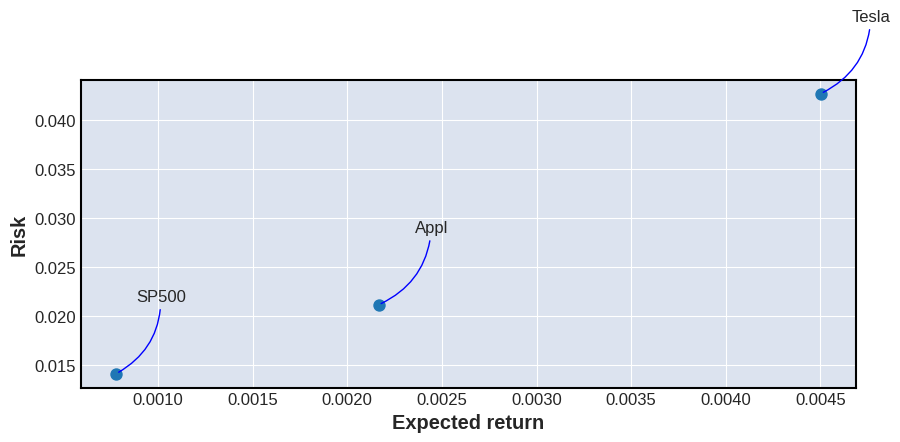

In [ ]:
# Next, we can find how much value do we put in risk
returns = all_rets.dropna()

A = np.pi * 20 # A = area

plt.figure(figsize=(10, 4))
plt.scatter(returns.mean(), returns.std(), s=A)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Awesome! That seems to match with our intuition since SP500 is a low risk long term investment while Tesla is extremely high risk stock.

#Predictions

To forecast SP500 stock, we will use LSTM in Pytorch




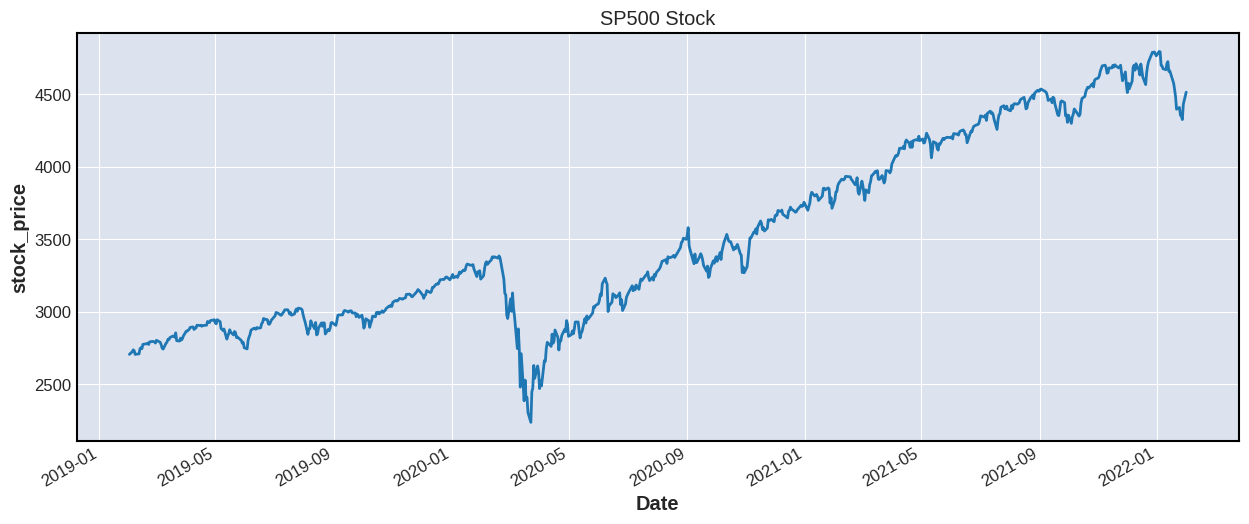

In [ ]:
df['Close'].plot(figsize = (15,6))
plt.ylabel("stock_price")
plt.title("SP500 Stock")
plt.show()

In [ ]:
# Create a new dataframe with only the Close column 
data = df.filter(['Close'])
dataset = data.values # convert to numpy array
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len




719

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_dataset = scaler.fit_transform(dataset)



In [ ]:
look_back = 60 # choose sequence length

# Create the training data set 
# Create the scaled training data set
train_data = scaled_dataset[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(look_back, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

print("before reshape: ", x_train.shape)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("After reshape: ", x_train.shape)

[array([-0.63337181, -0.61903892, -0.60901232, -0.61377157, -0.63374692,
       -0.63231689, -0.63081627, -0.60351831, -0.59703176, -0.6027368 ,
       -0.57939311, -0.57614211, -0.57228152, -0.57995596, -0.56605293,
       -0.56336441, -0.5650917 , -0.5662796 , -0.5724456 , -0.55744072,
       -0.56594342, -0.5684131 , -0.58263648, -0.60023602, -0.60481554,
       -0.57337555, -0.56695159, -0.55179044, -0.55369727, -0.54275618,
       -0.53458166, -0.53487072, -0.54138855, -0.51743545, -0.55976959,
       -0.56160602, -0.54589785, -0.55612765, -0.54825802, -0.53344069,
       -0.50781506, -0.50777595, -0.50296194, -0.49828072, -0.48784754,
       -0.48547955, -0.49921067, -0.49138778, -0.49130173, -0.4763829 ,
       -0.47781293, -0.47665631, -0.48182215, -0.47824279, -0.47594521,
       -0.45585271, -0.46087774, -0.46172183, -0.45100741, -0.44854555])]
[-0.4463572949499732]

[array([-0.63337181, -0.61903892, -0.60901232, -0.61377157, -0.63374692,
       -0.63231689, -0.63081627, -0.6

In [ ]:
# Create the testing data set
# Create a new array containing scaled values
test_data = scaled_dataset[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(look_back, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1) ) )
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
659/659 [==============================] - 11s 8ms/step - loss: 0.0078
Epoch 2/2
659/659 [==============================] - 5s 8ms/step - loss: 0.0038


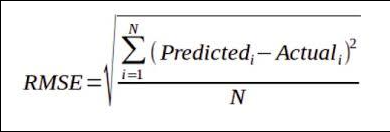

In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

112.03311913686163

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


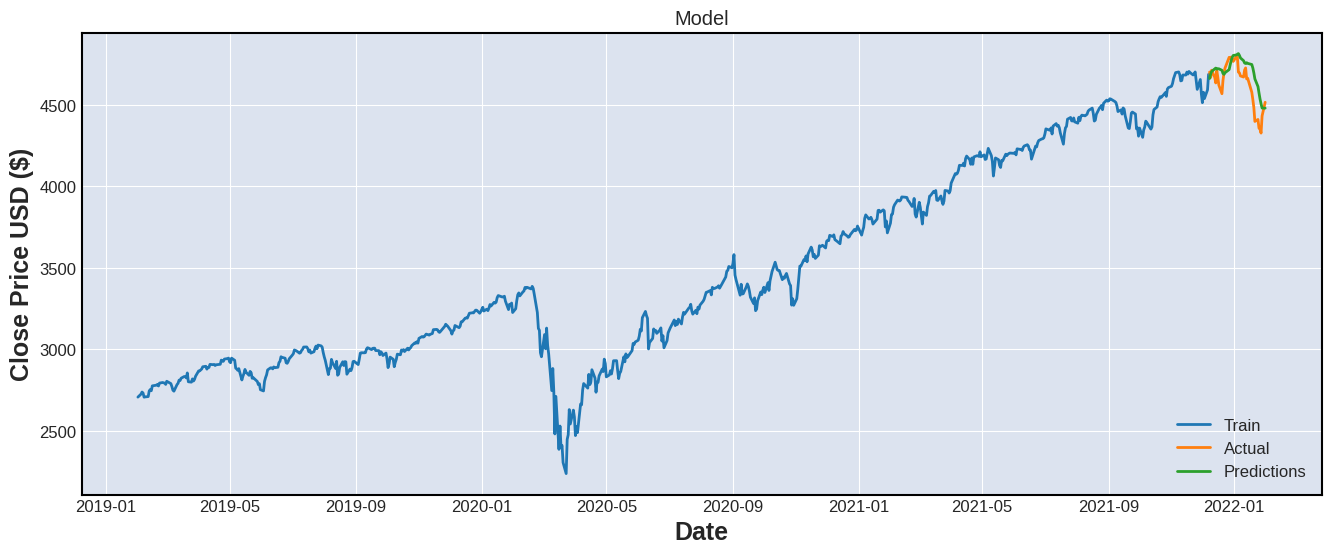

In [ ]:
#Plot the data
train = data[:training_data_len] # beginning to training_data length
valid = data[training_data_len:] # training_data length to end
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-12-08,4701.209961,4661.246094
2021-12-09,4667.450195,4687.558105
2021-12-10,4712.020020,4704.401855
2021-12-13,4668.970215,4720.321289
2021-12-14,4634.089844,4725.286621
2021-12-15,4709.850098,4718.707031
2021-12-16,4668.669922,4721.223633
2021-12-17,4620.640137,4720.889648
2021-12-20,4568.020020,4711.812012
